In [6]:
%load_ext autoreload
%autoreload 2
import _pathmagic
import pandas as pd
# from acanogan import acanogan_model,acanogan_predict, acanogan_test
from sklearn import metrics
import matplotlib.pyplot as plt
import os
import numpy as np
# import scikitplot as skplt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


normal score 用意

In [7]:
dataset_5032AB_test_normal=pd.read_csv("../dataset/5032AB_test_normal.csv",index_col=0,header=None)

FileNotFoundError: [Errno 2] File ../dataset/5032AB_test_normal.csv does not exist: '../dataset/5032AB_test_normal.csv'

In [ ]:
# def save_normal_score(all_score_df,save):
#     normal_score=all_score_df.loc[dataset_5032AB_test_normal.index.to_list()]
#     normal_score.to_csv(save,header=None)

In [ ]:
# #0
# dataset_5032AB_test_w_0_score=pd.read_csv("./score/dataset_5032AB_test_w=0.csv",index_col=0,header=None)
# save_normal_score(dataset_5032AB_test_w_0_score,"./score/dataset_5032AB_test_normal_w=0.csv")
# 
# # 0.1
# dataset_5032AB_test_w_01_score=pd.read_csv("./score/dataset_5032AB_test_w=0.1.csv",index_col=0,header=None)
# save_normal_score(dataset_5032AB_test_w_01_score,"./score/dataset_5032AB_test_normal_w=0.1.csv")
# 
# #0.5
# dataset_5032AB_test_w_05_score=pd.read_csv("./score/dataset_5032AB_test_w=0.5.csv",index_col=0,header=None)
# save_normal_score(dataset_5032AB_test_w_05_score,"./score/dataset_5032AB_test_normal_w=0.5.csv")
# 
# # 1
# dataset_5032AB_test_w_1_score=pd.read_csv("./score/dataset_5032AB_test_w=1.csv",index_col=0,header=None)
# save_normal_score(dataset_5032AB_test_w_1_score,"./score/dataset_5032AB_test_normal_w=1.csv")


In [8]:
# load data
# normal_w_01=pd.read_csv("./score/dataset_5032AB_test_normal_w=0.1.csv",index_col=0,header=None,names=["score"])
# anomaly_w_01=pd.read_csv("./score/dataset_5032AB_test_anomaly_w=0.1.csv",header=None,index_col=0,names=["score"])
# anomaly_w_01.sort_values("score")
# dataset_5032AB_test_normal_score.sort_values("score")


In [9]:
dates=["19.03.11",  "19.07.09",  "19.12.17",  "20.01.06",  "20.04.14",
"19.04.02",  "19.10.07",  "19.12.23",  "20.02.25",  "20.05.05",  "20.07.25",
"19.04.12",  "19.11.08",  "19.12.27",  "20.04.07",  "20.05.15"]
dates

['19.03.11',
 '19.07.09',
 '19.12.17',
 '20.01.06',
 '20.04.14',
 '19.04.02',
 '19.10.07',
 '19.12.23',
 '20.02.25',
 '20.05.05',
 '20.07.25',
 '19.04.12',
 '19.11.08',
 '19.12.27',
 '20.04.07',
 '20.05.15']

In [10]:
dataset_5032AB_train=pd.read_csv("../data/elect_data/train/5032AB.csv",header=None,index_col=0)
dataset_5032AB_train

,1,2,3,4,5,6,7,8,9,10,...,111,112,113,114,115,116,117,118,119,120
0,,,,,,,,,,,,,,,,,,,,,
20.12.30,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,95.0,36.0,8.0,1.0,0.0,0.0,0.0,58.0,96.0,82
20.12.29,35,3.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
20.12.28,69,70.0,66,35,29.0,0.0,1.0,0.0,0.0,0.0,...,82.0,73.0,68.0,66.0,66.0,67.0,68.0,67.0,67.0,73
20.12.27,70,71.0,70,70,69.0,83.0,35.0,5.0,2.0,0.0,...,74.0,72.0,71.0,70.0,70.0,71.0,70.0,69.0,70.0,69
20.12.26,70,70.0,68,7,35.0,17.0,0.0,1.0,0.0,0.0,...,73.0,72.0,71.0,71.0,71.0,71.0,71.0,71.0,70.0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19.02.10,0,2.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,73.0,72.0,73.0,72.0,72.0,72.0,49.0,35.0,25.0,25
19.02.09,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,69.0,70.0,69.0,69.0,118.0,35.0,13.0,0.0,1.0,0
19.02.08,0,0.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,72.0,73.0,72.0,72.0,71.0,71.0,112.0,34.0,11.0,1


In [11]:
like_20_06_13=dataset_5032AB_train.loc[dates]
# like_20_06_13

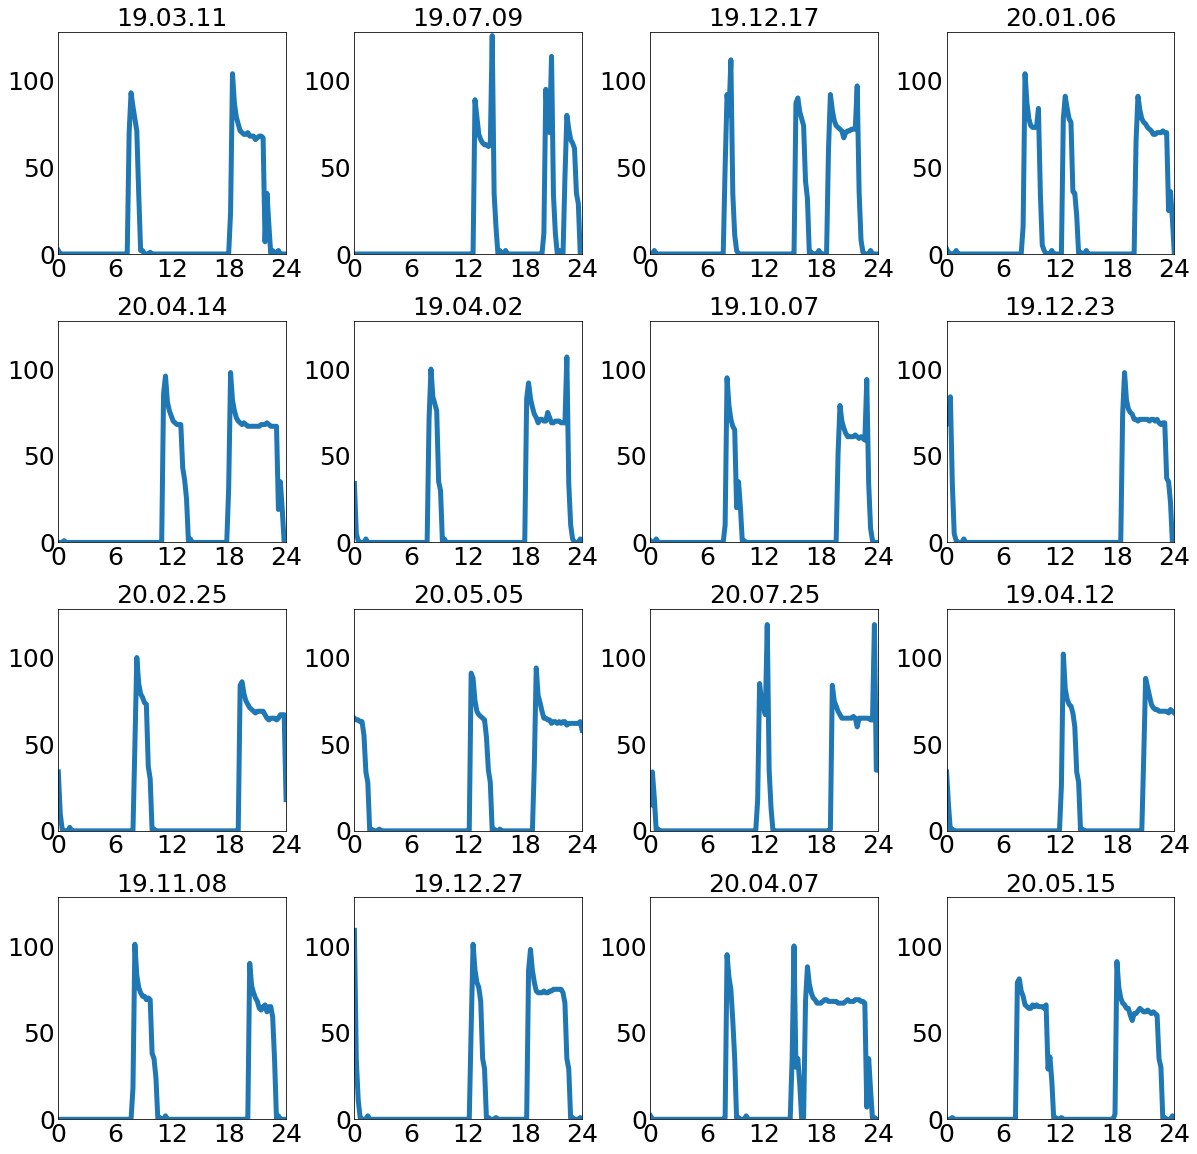

In [12]:
def save_sample_plot(gen_data):
    sample_num = 16
    # gen_sample = gen_data[np.random.choice(
    #     gen_data.shape[0], sample_num), :]
    gen_sample = gen_data.values
    # Write graph
    # b, w, c = gen_sample.shape
    # dir_path = "acgan/process_generated/" + self.data_id + "/"
    # os.makedirs(os.path.dirname(save_path), exist_ok=True)
    # save_path = os.path.join(dir_path, fname)
    # gen_sample = np.reshape(gen_sample, [b, w])
    
    x = np.linspace(0, 24, 120)
    plt.figure(figsize=(20, 20))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    dates=gen_data.index.to_list()
    for i, d in enumerate(gen_sample):
        plt.rcParams["font.size"] = 25
        plt.subplot(4, 4, i + 1)
        # plt.setp(axes.flat, aspect=1.0, adjustable='box-forced') 
        plt.xticks([0,6,12,18,24])
        plt.tick_params(length=0)
        plt.xlim([0, 24]) 
        y = max(128, d.max())
        plt.ylim([0, y])
        plt.gca().set_title(dates[i],size=25)
        plt.plot(x, d,lw=5)
    # plt.tight_layout()
    plt.show()
    # plt.savefig(save_path,bbox_inches='tight', pad_inches=0.01)
    plt.close()
save_sample_plot(like_20_06_13)